In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ndarray
%matplotlib inline
from typing import *

import torch
import torch.tensor as Tensor


# Declaring some simple type aliases:
LongTensor = torch.LongTensor
FloatTensor = torch.FloatTensor

tensor(2518.8262)
tensor(2517.1260)
tensor(6321.0938)
tensor(6317.3843)
tensor(1791.7969)
tensor(1789.9519)


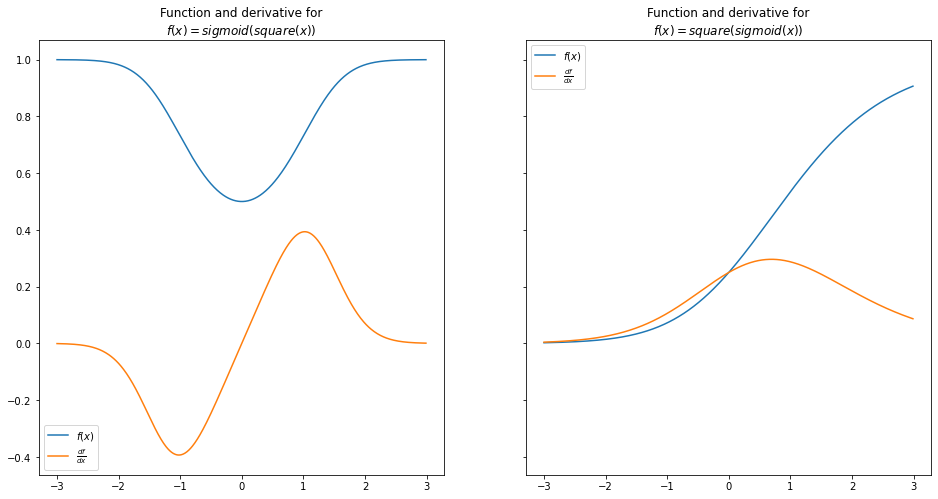

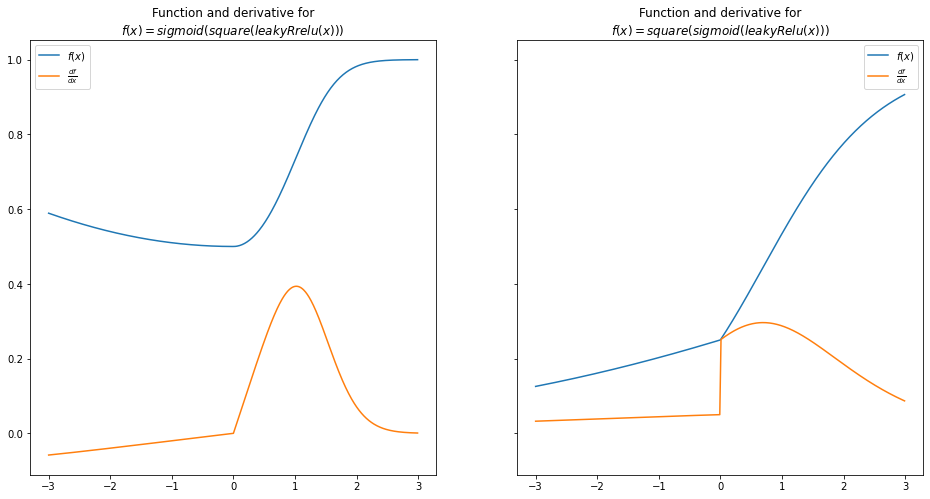

In [2]:
import sys
import os

PATH: str = '/development/projects/statisticallyfit/github/learningmathstat/PythonNeuralNetNLP'

NEURALNET_PATH: str = PATH + '/src/NeuralNetworkStudy/books/SethWeidman_DeepLearningFromScratch'

os.chdir(NEURALNET_PATH)
assert os.getcwd() == NEURALNET_PATH

sys.path.append(PATH)
sys.path.append(NEURALNET_PATH)
assert NEURALNET_PATH in sys.path


#from FunctionUtil import *

from src.NeuralNetworkStudy.books.SethWeidman_DeepLearningFromScratch.FunctionUtil import *

from src.NeuralNetworkStudy.books.SethWeidman_DeepLearningFromScratch.TypeUtil import *
from src.NeuralNetworkStudy.books.SethWeidman_DeepLearningFromScratch.Chapter1_FoundationDerivatives import *


## Computation Graph with 2D Matrix Inputs

## Functions with Multiple Matrix Inputs: (Forward Pass) Lambda Sum
Define the following, where $X$ and $W$ are now 2D matrices instead of higher-dim tensors (letting $X$ be $n \times m$ and $W$ be $m \times p$):
$$
X = \begin{pmatrix}
x_{11} & x_{12} & ... & x_{1m} \\
x_{21} & x_{22} & ... & x_{2m} \\
\vdots & \vdots & ... & \vdots \\
x_{n1} & x_{n2} & ... & x_{nm}
\end{pmatrix}
$$

$$
W = \begin{pmatrix}
w_{11} & w_{12} & ... & w_{1p} \\
w_{21} & w_{22} & ... & w_{2p} \\
\vdots & \vdots & ... & \vdots \\
w_{m1} & w_{m2} & ... & w_{mp}
\end{pmatrix}
$$

Define some straightforward operations on these matrices:

### STEP 1:
Multiply these matrices together using $N = \nu(X, W)$ and denoting the row $i$ and column $j$ in the resulting matrix as $(XW)_{ij}$:

$$
\begin{aligned}
N &= \nu(X,W) \\
&= X \times W \\
&= \begin{pmatrix}
  x_{11} \cdot w_{11} + x_{12} \cdot w_{21} + ... + x_{1m} \cdot w_{m1} &
  x_{11} \cdot w_{12} + x_{12} \cdot w_{22} + ... + x_{1m} \cdot w_{m2} &
  ... &
  x_{11} \cdot w_{1p} + x_{12} \cdot w_{2p} + ... + x_{1m} \cdot w_{mp} \\
  x_{21} \cdot w_{11} + x_{22} \cdot w_{21} + ... + x_{2m} \cdot w_{m1} &
  x_{21} \cdot w_{12} + x_{22} \cdot w_{22} + ... + x_{2m} \cdot w_{m2} &
  ... &
  x_{21} \cdot w_{1p} + x_{22} \cdot w_{2p} + ... + x_{2m} \cdot w_{mp} \\
  \vdots & \vdots & \vdots & \vdots \\
  x_{n1} \cdot w_{11} + x_{n2} \cdot w_{21} + ... + x_{nm} \cdot w_{m1} &
  x_{n1} \cdot w_{12} + x_{n2} \cdot w_{22} + ... + x_{nm} \cdot w_{m2} &
  ... &
  x_{n1} \cdot w_{1p} + x_{n2} \cdot w_{2p} + ... + x_{nm} \cdot w_{mp} \\
\end{pmatrix} \\
&= \begin{pmatrix}
  (XW)_{11} &   (XW)_{12} & ... & (XW)_{1p} \\
  (XW)_{21} &   (XW)_{22} & ... & (XW)_{2p} \\
  \vdots & \vdots & \vdots & \vdots \\
  (XW)_{n1} &   (XW)_{n2} & ... & (XW)_{np}
\end{pmatrix}
\end{aligned}
$$
where `X.shape == (n, m)`, and `W.shape == (m, p)`, and `N.shape == (n, p)`.

### STEP 2:
Feed $N$ through some differentiable function $\sigma$ and define $S = \sigma(N)$ (just applying $\sigma$ to every element of the matrix operation defined by $N$):


$$
\begin{aligned}
S &= \sigma(N) \\
 &= \sigma(\nu(X, W)) \\
 &= \sigma(X \times W) \\
 &= \begin{pmatrix}
  \sigma \Big( x_{11} \cdot w_{11} + x_{12} \cdot w_{21} + ... + x_{1m} \cdot w_{m1} \Big) &
  \sigma \Big( x_{11} \cdot w_{12} + x_{12} \cdot w_{22} + ... + x_{1m} \cdot w_{m2} \Big) &
  ... &
  \sigma \Big( x_{11} \cdot w_{1p} + x_{12} \cdot w_{2p} + ... + x_{1m} \cdot w_{mp} \Big) \\
  \sigma \Big( x_{21} \cdot w_{11} + x_{22} \cdot w_{21} + ... + x_{2m} \cdot w_{m1} \Big) &
  \sigma \Big( x_{21} \cdot w_{12} + x_{22} \cdot w_{22} + ... + x_{2m} \cdot w_{m2} \Big) &
  ... &
  \sigma \Big( x_{21} \cdot w_{1p} + x_{22} \cdot w_{2p} + ... + x_{2m} \cdot w_{mp} \Big) \\
  \vdots & \vdots & \vdots & \vdots \\
  \sigma \Big( x_{n1} \cdot w_{11} + x_{n2} \cdot w_{21} + ... + x_{nm} \cdot w_{m1} \Big) &
  \sigma \Big( x_{n1} \cdot w_{12} + x_{n2} \cdot w_{22} + ... + x_{nm} \cdot w_{m2} \Big) &
  ... &
  \sigma \Big( x_{n1} \cdot w_{1p} + x_{n2} \cdot w_{2p} + ... + x_{nm} \cdot w_{mp} \Big)
\end{pmatrix} \\
&= \begin{pmatrix}
  \sigma \Big( (XW)_{11} \Big) &   \sigma \Big( (XW)_{12} \Big) & ... & \sigma \Big( (XW)_{1p} \Big) \\
  \sigma \Big( (XW)_{21} \Big) &   \sigma \Big( (XW)_{22} \Big) & ... & \sigma \Big( (XW)_{2p} \Big) \\
  \vdots & \vdots & \vdots & \vdots \\
  \sigma \Big( (XW)_{n1} \Big) &   \sigma \Big( (XW)_{n2} \Big) & ... & \sigma \Big( (XW)_{np} \Big)
\end{pmatrix}
\end{aligned}
$$

where `S.shape == N.shape == (n, p)`.

### STEP 3:
Defining a $\Lambda$ function to sum up the elements in the matrix to find the total effect of changing each element of a matrix:

$$
\begin{aligned}
L &= \Lambda(\sigma(N(X, W))) \\
  &= \Lambda \begin{pmatrix}
\begin{pmatrix}
  \sigma \Big( (XW)_{11} \Big) &   \sigma \Big( (XW)_{12} \Big) & ... & \sigma \Big( (XW)_{1p} \Big) \\
  \sigma \Big( (XW)_{21} \Big) &   \sigma \Big( (XW)_{22} \Big) & ... & \sigma \Big( (XW)_{2p} \Big) \\
  \vdots & \vdots & \vdots & \vdots \\
  \sigma \Big( (XW)_{n1} \Big) &   \sigma \Big( (XW)_{n2} \Big) & ... & \sigma \Big( (XW)_{np} \Big)
\end{pmatrix}
\end{pmatrix} \\

&= \sigma(XW_{11}) + ... + \sigma(XW_{1p}) + \sigma(XW_{21}) + ... + \sigma(XW_{2p}) + ... ... ... + \sigma(XW_{n1}) + ... + \sigma(XW_{np})
\end{aligned}
$$
 where $\Lambda$.`shape == (1,1)` so $\Lambda$ is a constant

* NOTE: the code can handle higher-dim tensors while the formulas above handle only 2-dim tensors (matrices). So in the code, we have:
  * `X.shape == (..., n, m)`
  * `W.shape == (..., m, p)`
  * `N.shape == (..., n, p)`
  * `S.shape == (..., n, p)`
  * $\Lambda$`.shape == (1,1)`
* and in the formulas we have:
  * `X.shape == (n, m)`
  * `W.shape == (m, p)`
  * `N.shape == (n, p)`
  * `S.shape == (n, p)`
  * $\Lambda$`.shape == (1,1)`

* NOTE: the '...' is set to mean that all dimensions before the last two are the same for all tensors in these calculations.

In [3]:
def matrixForwardSum(Xa: Tensor, Wa: Tensor, sigma: TensorFunction) -> float:
     '''Computes the result of the forward pass of the function L with input tensors X and W and function sigma

     X.shape == (..., n, m)
     W.shape == (..., m, p)
     '''

     # NOTE: cast to float in case X or W is float else error   gets thrown
     X: Tensor = Xa.clone()
     W: Tensor = Wa.clone()
     # Now X and W are either float or long tensor

     if(Xa.type() == 'torch.FloatTensor' and Wa.type() == 'torch.LongTensor'):
         W: FloatTensor = W.type(torch.FloatTensor)
     elif(Xa.type() == 'torch.LongTensor' and Wa.type() == 'torch.FloatTensor'):
         X: FloatTensor = X.type(torch.FloatTensor)

     # Now X, W are either BOTH Long or BOTH Float tensors.

     isFirstPartEqualShape: bool = X.shape[:len(X.shape)-2] == W.shape[0:len(W.shape)-2]
     canDoMatMul: bool = X.shape[-1] == W.shape[-2]

     assert isFirstPartEqualShape and canDoMatMul

     # Matrix multiplication:
     N: Tensor = torch.matmul(X, W)
     ## N.shape == (..., n,p)

     # Feeding the output of the matrix multiplication through sigma:
     S: Tensor = sigma(N)
     ## S.shape == (..., n, p)

     # Sum all the elements : L = lambda(S(N(X,Y)))
     L: Tensor = torch.sum(S)
     ## L.shape == (1,1) (0 - dim tensor or constant)

     return L # shape 1x1








### Background: Gradients
The **gradient** of a multivariable function $f(\mathbf{x}) = f(x_1,x_2,...,x_n)$ from $\mathbb{R}^n \longrightarrow \mathbb{R}$ is defined as:

* Notation 1:
$$
\nabla f(\mathbf{x}) = \frac{\partial}{\partial \mathbf{x}} f(\mathbf{x})
{\Large
= \begin{pmatrix}
        \frac{\partial }{\partial x_1} f(\mathbf{x}) &
        \frac{\partial }{\partial x_2} f(\mathbf{x}) & ... &
        \frac{\partial }{\partial x_n} f(\mathbf{x})
\end{pmatrix} }
$$

* Notation 2:
$$
\nabla f(x_1,...,x_n) = \frac{\partial f}{\partial \mathbf{x}}
{\Large
= \begin{pmatrix}
        \frac{\partial f}{\partial x_1} &
        \frac{\partial f}{\partial x_2} & ... &
        \frac{\partial f}{\partial x_n}
\end{pmatrix} }
$$



### Background: Jacobian Matrix and Multivariable Functions
A vector $\mathbf{f} = \big( f_1, f_2, ..., f_m \big)$ of $m$ functions, each depending on $n$ variables $\mathbf{x} = \big(x_1, x_2, ..., x_n \big)$ defines a transformation or function from $\mathbb{R}^n$ to $\mathbb{R}^m$. Specifically, if $\mathbf{x} \in \mathbb{R}^n$ and if:
$$
y_1 = f_1 \big(x_1,x_2,...,x_n \big) \\
y_2 = f_2 \big(x_1,x_2,...,x_n \big) \\
\vdots \\
y_m = f_m \big(x_1,x_2,...,x_n \big)
$$
then $\mathbf{y} = \big(y_1, y_2, ..., y_m \big)$ is the point in $\mathbb{R}^m$ that corresponds to $\mathbf{x}$ under the transformation $\mathbf{f}$. We can write these equations more compactly as:
$$
\mathbf{y} = \mathbf{f}(\mathbf{x})
$$
Information about the rate of change of $\mathbf{y}$ with respect to $\mathbf{x}$ is contained in the various partial derivatives $\frac{\partial y_i}{\partial x_j}$ for $1 \leq i \leq m, 1 \leq j \leq n$ and is conveniently organized into an $m \times n$ matrix $\frac{\partial \mathbf{y}}{\partial \mathbf{x}}$ called the **Jacobian matrix** of the transformation $\mathbf{f}$. The Jacobian matrix is the collection of all $m \times n$ possible partial derivatives ($m$ rows and $n$ columns), which is the stack of $m$ gradients with respect to $\mathbf{x}$:
$$
\Large
\begin{aligned}
\frac{\partial \mathbf{y}}{\partial \mathbf{x}} &= \begin{pmatrix}
   \nabla f_1(\mathbf{x}) \\
   \nabla f_2(\mathbf{x}) \\
   \vdots \\
   \nabla f_m(\mathbf{x})
\end{pmatrix}

= \begin{pmatrix}
   \frac{\partial}{\partial \mathbf{x}} f_1(\mathbf{x}) \\
   \frac{\partial}{\partial \mathbf{x}} f_2(\mathbf{x}) \\
   \vdots \\
   \frac{\partial}{\partial \mathbf{x}} f_m(\mathbf{x})
\end{pmatrix}

= \begin{pmatrix}
  \frac{\partial}{\partial x_1} f_1(\mathbf{x}) & \frac{\partial}{\partial x_2} f_1(\mathbf{x}) & ... & \frac{\partial}{\partial x_n} f_1(\mathbf{x}) \\
  \frac{\partial}{\partial x_1} f_2(\mathbf{x}) & \frac{\partial}{\partial x_2} f_2(\mathbf{x}) & ... & \frac{\partial}{\partial x_n} f_2(\mathbf{x}) \\
  \vdots & \vdots &  & \vdots \\
  \frac{\partial}{\partial x_1} f_m(\mathbf{x}) & \frac{\partial}{\partial x_2} f_m(\mathbf{x}) & ... & \frac{\partial}{\partial x_n} f_m(\mathbf{x})
\end{pmatrix} \\

\frac{\partial \mathbf{y}}{\partial \mathbf{x}} &= \begin{pmatrix}
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & ... & \frac{\partial f_1}{\partial x_n} \\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & ... & \frac{\partial f_2}{\partial x_n} \\
  \vdots & \vdots &  & \vdots \\
  \frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & ... & \frac{\partial f_m}{\partial x_n}
\end{pmatrix}
\end{aligned}
$$
This linear transformation represented by the Jacobian matrix is called **the derivative** of the transformation $\mathbf{f}$.

Each $\frac{\partial f_i}{\partial \mathbf{x}}$ is a horizontal $n$-vector because the partial derivative is with respect to a vector $\mathbf{x}$ whose length is $n = |\mathbf{x}|$, making the width of the Jacobian $n$ (there are $n$ parameters that are variable, each potentially changing the function's value).


### Background: Chain Rule for Matrices
In general the Jacobian matrix of the composition of two vector-valued functions of a vector variable is the matrix product of their Jacobian matrices.

To see this let $\mathbf{z} = \mathbf{f}(\mathbf{y})$ be a transformation from $\mathbb{R}^k$ to $\mathbb{R}^m$ given by:
$$
z_1 = f_1 \big(y_1,y_2,...,y_k \big) \\
z_2 = f_2 \big(y_1,y_2,...,y_k \big) \\
\vdots \\
z_k = f_m \big(y_1,y_2,...,y_k \big)
$$
which has the $m \times k$ Jacobian matrix:
$$
\Large
\frac{\partial \mathbf{f}}{\partial \mathbf{y}} = \begin{pmatrix}
  \frac{\partial f_1}{\partial y_1} & \frac{\partial f_1}{\partial y_2} & ... & \frac{\partial f_1}{\partial y_k} \\
  \frac{\partial f_2}{\partial y_1} & \frac{\partial f_2}{\partial y_2} & ... & \frac{\partial f_2}{\partial y_k} \\
  \vdots & \vdots &  & \vdots \\
  \frac{\partial f_m}{\partial y_1} & \frac{\partial f_m}{\partial y_2} & ... & \frac{\partial f_m}{\partial y_k}
\end{pmatrix}
$$


and let $\mathbf{y} = \mathbf{g}(\mathbf{x})$ be another such transformation from $\mathbb{R}^n$ to $\mathbb{R}^k$ given by:

$$
y_1 = g_1 \big(x_1,x_2,...,x_n \big) \\
y_2 = g_2 \big(x_1,x_2,...,x_n \big) \\
\vdots \\
y_k = g_k \big(x_1,x_2,...,x_n \big)
$$
which has the $k \times n$ Jacobian matrix:
$$
\Large
\frac{\partial \mathbf{g}}{\partial \mathbf{x}} = \begin{pmatrix}
  \frac{\partial g_1}{\partial x_1} & \frac{\partial g_1}{\partial x_2} & ... & \frac{\partial g_1}{\partial x_n} \\
  \frac{\partial g_2}{\partial x_1} & \frac{\partial g_2}{\partial x_2} & ... & \frac{\partial g_2}{\partial x_n} \\
  \vdots & \vdots &  & \vdots \\
  \frac{\partial g_k}{\partial x_1} & \frac{\partial g_k}{\partial x_2} & ... & \frac{\partial g_k}{\partial x_n}
\end{pmatrix}
$$

Then the composition $\mathbf{z} = (\mathbf{f} \circ \mathbf{g})(\mathbf{x}) = \mathbf{f}(\mathbf{g}(\mathbf{x}))$ given by :
$$
z_1 = f_1 \big( g_1 \big( x_1,...,x_n \big),..., g_k \big( x_1,...,x_n \big) \big) \\
z_2 = f_2 \big( g_1 \big( x_1,...,x_n \big),..., g_k \big( x_1,...,x_n \big) \big) \\
\vdots \\
z_k = f_m \big( g_1 \big( x_1,...,x_n \big),..., g_k \big( x_1,...,x_n \big) \big)
$$

has, according to the Chain Rule, the $m \times n$ Jacobian matrix

$$
\Large
\begin{aligned}

\frac{\partial}{\partial \mathbf{x}} \mathbf{f} \big( \mathbf{g}(\mathbf{x}) \big) &= \frac{\partial \mathbf{f}}{\partial \mathbf{g}} \times \frac{\partial \mathbf{g}}{\partial \mathbf{x}} \\

\begin{pmatrix}
\frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & ... & \frac{\partial f_1}{\partial x_n} \\
\frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & ... & \frac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & & \vdots \\
\frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & ... & \frac{\partial f_m}{\partial x_n}
\end{pmatrix}

&= \begin{pmatrix}
\frac{\partial f_1}{\partial g_1} & \frac{\partial f_1}{\partial g_2} & ... & \frac{\partial f_1}{\partial g_k} \\
\frac{\partial f_2}{\partial g_1} & \frac{\partial f_2}{\partial g_2} & ... & \frac{\partial f_2}{\partial g_k} \\
\vdots & \vdots & & \vdots \\
\frac{\partial f_m}{\partial g_1} & \frac{\partial f_m}{\partial g_2} & ... & \frac{\partial f_m}{\partial g_k}
\end{pmatrix}

\times

\begin{pmatrix}
\frac{\partial g_1}{\partial x_1} & \frac{\partial g_1}{\partial x_2} & ... & \frac{\partial g_1}{\partial x_n} \\
\frac{\partial g_2}{\partial x_1} & \frac{\partial g_2}{\partial x_2} & ... & \frac{\partial g_2}{\partial x_n} \\
\vdots & \vdots & & \vdots \\
\frac{\partial g_k}{\partial x_1} & \frac{\partial g_k}{\partial x_2} & ... & \frac{\partial g_k}{\partial x_n}
\end{pmatrix}

\end{aligned}
$$
where $\times$ denotes matrix multiplication, and $m = |\mathbf{f}|, n = |\mathbf{x}|$ and $k = |\mathbf{g}|$.


**SOURCES:**
* R.A Adams - Calculus: A Complete Course (sections 12.5 and 12.6)
* Thomas Weir - Calculus (section 14.4)
* [Medium's blog post on "The Matrix Calculus you Need for Deep Learning"](https://medium.com/@rohitrpatil/the-matrix-calculus-you-need-for-deep-learning-notes-from-a-paper-by-terence-parr-and-jeremy-4f4263b7bb8)






## Derivative of Functions with Multiple Matrix Inputs: (Backward Pass) Lambda Sum

We have a number $L$ and we want to find out the gradient of $L$ with respect to $X$ and $W$; how much changing *each element* of these input matrices (so each $x_{ij}$ and each $w_{ij}$) would change $L$. This is written as:

**Direct Way:**

$$
\large
\frac{\partial \Lambda}{\partial X} = \begin{pmatrix}
  \frac{\partial \Lambda}{\partial x_{11}} & \frac{\partial \Lambda}{\partial x_{12}} & ... & \frac{\partial \Lambda}{\partial x_{1m}} \\
  \frac{\partial \Lambda}{\partial x_{21}} & \frac{\partial \Lambda}{\partial x_{22}} & ... & \frac{\partial \Lambda}{\partial x_{2m}} \\
  \vdots & \vdots & \vdots & \vdots \\
  \frac{\partial \Lambda}{\partial x_{n1}} & \frac{\partial \Lambda}{\partial x_{n2}} & ... & \frac{\partial \Lambda}{\partial x_{nm}}
\end{pmatrix}
$$


**Chain Rule way (Backward pass):**
The chain rule gives the same result as the direct way above but is simpler for the user to calculate:
$$
\frac{\partial \Lambda}{\partial X} = \frac{\partial N}{\}
$$





In [4]:

# TODO: equivalent for the matrix W (understand why dot first then matmul in the chain rule)


def matrixBackwardSum_X(Xa: Tensor, Wa: Tensor, sigma: TensorFunction) -> Tensor:
    '''Computes derivative of matrix function with respect to the first element X'''

    # NOTE: cast to float in case X or W is float else error   gets thrown
    X: Tensor = Xa.clone()
    W: Tensor = Wa.clone()
    # Now X and W are either float or long tensor

    if(Xa.type() == 'torch.FloatTensor' and Wa.type() == 'torch.LongTensor'):
         W: FloatTensor = W.type(torch.FloatTensor)
    elif(Xa.type() == 'torch.LongTensor' and Wa.type() == 'torch.FloatTensor'):
         X: FloatTensor = X.type(torch.FloatTensor)

    # Now X, W are either BOTH Long or BOTH Float tensors.


    isFirstPartEqualShape: bool = X.shape[:len(X.shape)-2] == W.shape[0:len(W.shape)-2]
    canDoMatMul: bool = X.shape[-1] == W.shape[-2]

    assert isFirstPartEqualShape and canDoMatMul

    ### Forward pass: Matrix multiplication:
    # X.shape = (...,n, m)
    # W.shape = (...,m, p)
    N: Tensor = torch.matmul(X, W)
    # N.shape = (...,n, p)

    # NOTE: result of matmul is either Float or Long Tensor depending on whether both X,W are Float or Long tensor. But they must be of the same kind (hence the if-else above)

    # Feeding the output of the matrix multiplication through sigma:
    S: Tensor = sigma(N)
    # S.shape = N.shape = (...,n, p)

    # Sum all the elements:
    #L: Tensor = torch.sum(S)
    # L.shape == (1 x 1)



    ### Backward pass: chain rule for matrix (df/dX) or (dS/dX)
    dL_dS: Tensor = torch.ones(S.shape)
    # dL_dS.shape == S.shape == (...,n, p)

    dS_dN: FloatTensor = deriv(sigma, N) # NOTE: result is always a float tensor since deriv() is an approximation.
    # dS_dN.shape = N.shape = (...,n, p)

    # TODO FIGURE OUT why we have element-wise multiplication here:
    dL_dN: FloatTensor = dL_dS * dS_dN
    # dL_dN.shape == (...,n, p)
    ## NOTE: Matrix multiplication with "*" is allowed even when the tensors have different types, so no need to convert dL_dS to type Float here, to match type float of dS_dN

    # Transpose along first two dimensions (this example assumes we are
    # using 2-dim tensors which are matrices)

    # NOTE: need to convert to float tensor because dS_dN is a float tensor, after the approx derivative calculation,
    # while W is just a long tensor and if we don't convert, we get runtime error. .
    dN_dX: FloatTensor = torch.transpose(W, W.ndim - 2, W.ndim - 1).type(torch.FloatTensor)
    # torch.transpose(W, 1, 0)
    ## dN_dX.shape = W^T.shape = (...,p,m)


    # TODO: why matrix multiplication here and why element wise multiply above?
    dL_dX: FloatTensor = torch.matmul(dS_dN, dN_dX)
    # dL_dX.shape == (..., n,m)

    assert dL_dX.shape == X.shape

    return dL_dX ## shape == (...,n,m)

In [5]:
X: Tensor = torch.arange(3*4*2*7).reshape(3,2,4,7)
W: Tensor = torch.arange(3*5*2*7).reshape(3,2,7,5) + 30

sigma: TensorFunction = lambda t: 2*t + t

assert matrixBackwardSum_X(X, W, sigma).shape == (3, 2, 4, 7)

matrixBackwardSum_X(X, W, sigma)

tensor([[[[ 468.7500,  541.9921,  615.2343,  688.4765,  761.7187,  834.9609,
            908.2031],
          [ 468.7500,  541.9921,  615.2343,  688.4765,  761.7187,  834.9609,
            908.2031],
          [ 624.9999,  722.6562,  820.3124,  917.9687, 1015.6249, 1113.2811,
           1210.9374],
          [ 624.9999,  722.6562,  820.3124,  917.9687, 1015.6249, 1113.2811,
           1210.9374]],

         [[2617.1873, 2812.4998, 3007.8123, 3203.1248, 3398.4373, 3593.7498,
           3789.0623],
          [2617.1873, 2812.4998, 3007.8123, 3203.1248, 3398.4373, 3593.7498,
           3789.0623],
          [2617.1873, 2812.4998, 3007.8123, 3203.1248, 3398.4373, 3593.7498,
           3789.0623],
          [2617.1873, 2812.4998, 3007.8123, 3203.1248, 3398.4373, 3593.7498,
           3789.0623]]],


        [[[   0.0000,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000,
              0.0000],
          [   0.0000,    0.0000,    0.0000,    0.0000,    0.0000,    0.0000,
              0.0

In [6]:
x: Tensor = torch.rand(2,10)
w: Tensor = torch.rand(10,2)

matrixBackwardSum_X(x, w, sigmoid)

tensor([[0.0368, 0.0805, 0.0629, 0.0728, 0.0968, 0.0948, 0.0956, 0.0869, 0.0426,
         0.0649],
        [0.0340, 0.0596, 0.0650, 0.0655, 0.0809, 0.0813, 0.0748, 0.0783, 0.0423,
         0.0510]])

#### Testing if the derivatives computed are correct:
A simple test is to perturb the array and observe the resulting change in output. If we increase $x_{2,1,3}$ by 0.01 from -1.726 to -1.716 we should see an increase in the value porduced by the forward function of the *gradient of the output with respect to $x_{2,1,3}$*.

In [7]:

def doForwardSumIncr_X(Xa: Tensor, Wa: Tensor, sigma: TensorFunction, indices: Tuple[int], increment: float) -> Tensor:

     ## WARNING: the X must be FloatType tensors or else the later assertions here will fail! (only integer part of decimal gets copied)

     # NOTE: cast to float in case X or W is float else error   gets thrown
     X: Tensor = Xa.clone()
     W: Tensor = Wa.clone()
     # Now X and W are either float or long tensor

     if(Xa.type() == 'torch.FloatTensor' and Wa.type() == 'torch.LongTensor'):
         W: FloatTensor = W.type(torch.FloatTensor)
     elif(Xa.type() == 'torch.LongTensor' and Wa.type() == 'torch.FloatTensor'):
         X: FloatTensor = X.type(torch.FloatTensor)

     # Now X, W are either BOTH Long or BOTH Float tensors.

     ##
     FLAG_NUM: int = -1.726


     print("BEFORE: {}".format(X[indices]))
     X[indices] = FLAG_NUM # setting the starting value for sake of example
     X_ = X.clone()

     # Increasing the value at that point by 0.01
     X_[indices] = X[indices] + increment

     print("AFTER: {}".format(X_[indices]))
     assert X[indices] == FLAG_NUM
     assert X_[indices] == X[indices] + increment

     return matrixForwardSum(X_, W, sigma)

Testing with 2-dim tensors:

In [8]:
X: Tensor = torch.arange(5*4).reshape(5,4)
W: Tensor = torch.rand(4,5)
Xc: Tensor = X.clone()

indices = (2,1)
increment = 0.01
inc: Tensor = doForwardSumIncr_X(Xc, W, sigma, indices = indices, increment = increment)
incNot: Tensor = doForwardSumIncr_X(Xc, W, sigma, indices = indices, increment = 0)


print(((inc - incNot)/increment).sum())

print(matrixBackwardSum_X(Xc, W, sigma)[indices])

BEFORE: 9.0
AFTER: -1.715999960899353
BEFORE: 9.0
AFTER: -1.7259999513626099
tensor(8.0200)
tensor(8.0083)


Testing with 3-dim tensors:

In [9]:
X: Tensor = torch.arange(5*4*3).reshape(5,4,3)
W: Tensor = torch.rand(5,3,4)

indices = (2,1,2)
increment = 0.01
inc: Tensor = doForwardSumIncr_X(X, W, sigma, indices = indices, increment = increment)
incNot: Tensor = doForwardSumIncr_X(X, W, sigma, indices = indices, increment = 0)

print(torch.sum((inc - incNot) / increment))

print(matrixBackwardSum_X(X, W, sigma)[indices])
#matrixBackwardExtra_X(X, W, sigma)[2,1,3]

BEFORE: 29.0
AFTER: -1.715999960899353
BEFORE: 29.0
AFTER: -1.7259999513626099
tensor(2.2461)
tensor(2.2480)


Testing with 4-dim tensors:

In [10]:
X: Tensor = torch.arange(5*4*3*2).reshape(5,2,4,3)
W: Tensor = torch.rand(5,2,3,1) #.type(torch.FloatTensor)


indices = (2,1,2,0)
increment = 0.01
inc: Tensor = doForwardSumIncr_X(X, W, sigma, indices = indices, increment = increment)
incNot: Tensor = doForwardSumIncr_X(X, W, sigma, indices = indices, increment = 0)

print(torch.sum((inc - incNot) / increment))

print(matrixBackwardSum_X(X, W, sigma)[indices])

BEFORE: 66.0
AFTER: -1.715999960899353
BEFORE: 66.0
AFTER: -1.7259999513626099
tensor(0.8789)
tensor(0.9079)
